In [37]:
#Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import MLBacktester as MLB
plt.style.use("seaborn")

In [38]:
#Read in the data
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")

Testing the first version of my machine learning algorithm using EUR/USD data 

In [39]:
symbol1 = "EURUSD"
#ptc stores the potential trading costs value
ptc1 = 0.00007
#Calling my mahcine learning algorithm + backtester class
ml1 = MLB.MLBacktester(symbol1, "2019-01-01", "2020-08-31", 0)

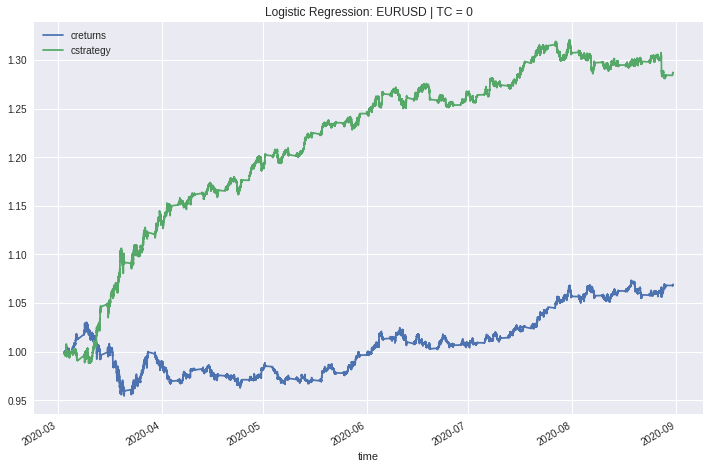

In [40]:
#Testing the statergy store in the ml variable and ploting the results against a simple buy and hold statergy
ml1.test_strategy(train_ratio= 0.7, lags = 2)
ml1.plot_results()

In [41]:
#Prints out the number of trades this algorithm takes
ml1.results.trades.value_counts()
#Calulates the hit ratio of this algoritm i.e. win ratio
hits = np.sign(ml1.results.returns * ml1.results.pred).value_counts()
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5116473894714085

This stratergy with the chosen training ratio and number of lags out performs the common buy and hold stratergy producing a 30% ROI. However, this the number of trades taken shows excessive trading. I am going to need to find a way to limit the number of trades taken. I will now write some code that will test this stratergy using a diffrent number of lags

In [42]:
for lags in range(1, 21):
    print(lags, ml1.test_strategy(train_ratio = 0.7, lags = lags))
ml1.results.trades.value_counts()

1 (1.288633, 0.219298)
2 (1.286446, 0.21714)
3 (1.216406, 0.146817)
4 (1.32749, 0.257757)
5 (1.333395, 0.263441)
6 (1.288601, 0.218498)
7 (1.282079, 0.212072)
8 (1.280877, 0.21088)
9 (1.355576, 0.285593)
10 (1.300582, 0.230291)
11 (1.335061, 0.264679)
12 (1.316419, 0.245975)
13 (1.325799, 0.255321)
14 (1.274767, 0.20412)
15 (1.260055, 0.189303)
16 (1.283069, 0.211744)
17 (1.269056, 0.197616)
18 (1.294975, 0.223996)
19 (1.316893, 0.246045)
20 (1.333242, 0.262331)


0.0    22711
2.0    14275
Name: trades, dtype: int64

I am now going to do the same process I did above but I will be using EUR/AUD data

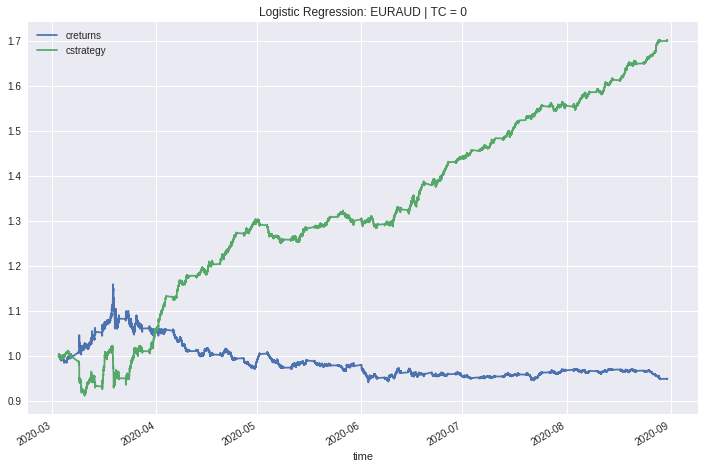

In [43]:
symbol2 = "EURAUD"
ptc2 = 0.00007
ml2 = MLB.MLBacktester(symbol2, "2019-01-01", "2020-08-31", 0)
ml2.test_strategy(train_ratio= 0.7, lags = 2)
ml2.plot_results()

In [44]:
ml2.results.trades.value_counts()
hits = np.sign(ml2.results.returns * ml2.results.pred).value_counts()
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5212811809708529

In [45]:
for lags in range(1, 21):
    print(lags, ml2.test_strategy(train_ratio = 0.7, lags = lags))
ml1.results.trades.value_counts()

1 (1.618959, 0.669992)
2 (1.700957, 0.751976)
3 (1.688437, 0.738829)
4 (1.678823, 0.729776)
5 (1.568475, 0.619141)
6 (1.608623, 0.659603)
7 (1.609968, 0.660825)
8 (1.621555, 0.672797)
9 (1.677693, 0.729174)
10 (1.589426, 0.640069)
11 (1.669541, 0.720298)
12 (1.717291, 0.768219)
13 (1.758792, 0.809989)
14 (1.786919, 0.838177)
15 (1.830543, 0.881757)
16 (1.702411, 0.753792)
17 (1.610886, 0.662314)
18 (1.649278, 0.700481)
19 (1.670748, 0.721605)
20 (1.751434, 0.80169)


0.0    22711
2.0    14275
Name: trades, dtype: int64

I will now do the same process again using GBP/USD data

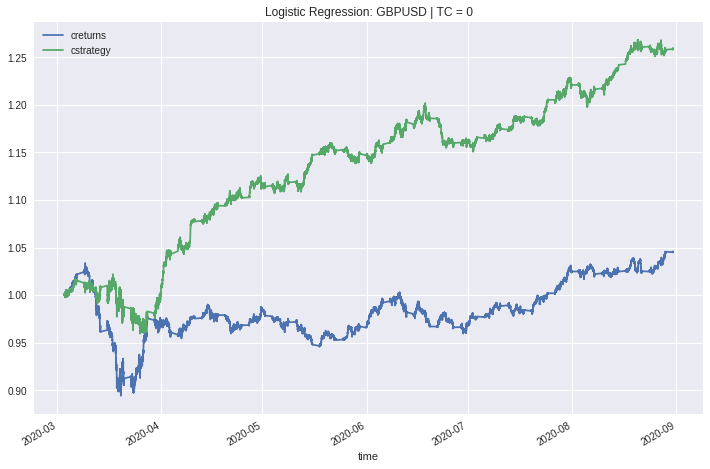

In [46]:
symbol3 = "GBPUSD"
ptc3 = 0.00007
ml3 = MLB.MLBacktester(symbol3, "2019-01-01", "2020-08-31", 0)
ml3.test_strategy(train_ratio= 0.7, lags = 2)
ml3.plot_results()

In [47]:
ml3.results.trades.value_counts()
hits = np.sign(ml3.results.returns * ml3.results.pred).value_counts()
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5094181326116374

In [48]:
for lags in range(1, 21):
    print(lags, ml3.test_strategy(train_ratio = 0.7, lags = lags))
ml3.results.trades.value_counts()

1 (1.296857, 0.250952)
2 (1.259263, 0.213407)
3 (1.212435, 0.166547)
4 (1.267254, 0.221435)
5 (1.264394, 0.218505)
6 (1.299228, 0.253634)
7 (1.315773, 0.270363)
8 (1.372651, 0.327319)
9 (1.367302, 0.32204)
10 (1.36549, 0.320153)
11 (1.37577, 0.330414)
12 (1.385121, 0.340001)
13 (1.334433, 0.289183)
14 (1.306515, 0.261334)
15 (1.301436, 0.256427)
16 (1.32572, 0.280527)
17 (1.312297, 0.2671)
18 (1.324813, 0.279378)
19 (1.319064, 0.273736)
20 (1.316946, 0.271614)


0.0    23744
2.0    13188
Name: trades, dtype: int64

After running a number of tests with diffrent numbers of lags and potential trading costs I have deemed this stratergy not profiterable. I am goinng ot try and devlop a new algorithm using a more complex deep nueral network approatch for classification